## RNN Integration Task

Integration task in **recurrent neural network** with:
- a reLU function
- backpropagating method
- MSE error
- LSTM architecture



implement input trials

In [5]:
import torch
import torch.nn as nn

#number of trials and sequence length
num_trials = 100
sequence_length = 2
#Random sequence of 0 and 1
input_trials = torch.randint(2, size=(num_trials, sequence_length)).float()

#Generation of random input trials
#input_trials = []
targets = []
for _ in range(num_trials):
    sequence = torch.randn(sequence_length, input_size)
    #Cumulative sum of the sequenced
    target = torch.cumsum(sequence, dim=0)
    #add the sequence and target to the input trials
    targets.append(target)

#Convert input trials and targets to tensors
targets = torch.stack(targets).float()

sample_index = 0
print("Input Trial:", input_trials[sample_index])
print("Target:", targets[sample_index])


Input Trial: tensor([1., 0.])
Target: tensor([[ 0.6852, -0.6041],
        [ 0.0495, -1.4055]])


C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 2, 2])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test Input: tensor([[ 0.1210, -0.4106],
        [-0.4351,  0.6871]])
Predicted Output: tensor([0.0398, 0.0124])


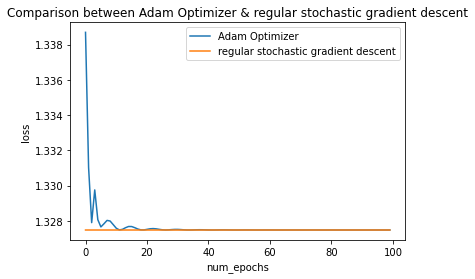

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

#LSTM-based integration model
class IntegrationModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(IntegrationModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
       
    def forward(self, input_seq):
        _, (hidden, _) = self.lstm(input_seq)
        output = self.fc(self.relu(hidden[-1]))
        return output
 


    
input_size = 2  #size of the input sequence
hidden_size = 32  #nr of hidden units in the LSTM layer
output_size = 2  #size of the output (predicted integrated value)
learning_rate = 0.01
num_epochs = 100

model = IntegrationModel(input_size, hidden_size, output_size)

#loss function and the optimizer
criterion = nn.MSELoss()

#adam optimizer adjust the learning rate based on the momentum of the gradient
#can accelarate the gradient descent, no guarantee to converge
optimizer_adam = optim.Adam(model.parameters(), lr=learning_rate) #????

x_axis = torch.arange(0,num_epochs)
loss_vector_adam = []
#print(outputs)
#----------------------------------
#Training loop with adam optimizer
#----------------------------------
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    #forward pass
    outputs = model(input_trials)
    #print('outputs = ',outputs)

    optimizer_adam.zero_grad()#set the gradients to zero
    #loss calculous
    loss = criterion(outputs, targets)

    #Backpropagation and optimization
    loss.backward() #backpropagating
    optimizer_adam.step() #parameter update
    
    loss_vector_adam.append(loss.item())
    #tracking training progress
    epoch_loss += loss.item()

    #print("Epoch {}: Loss = {}".format(epoch+1, epoch_loss))
    



loss_vector_sgd = []
#using a regular stochastic gradient descent
optimizer_sgd = optim.SGD(model.parameters(), lr=learning_rate)
#----------------------------------
#Training loop with regular stochastic gradient descent
#----------------------------------
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    #forward pass
    outputs = model(input_trials)

    optimizer_sgd.zero_grad()#set the gradients to zero
    #loss calculous
    loss = criterion(outputs, targets)

    #Backpropagation and optimization
    loss.backward() #backpropagating
    optimizer_sgd.step() #parameter update
    
    loss_vector_sgd.append(loss.item())
    #tracking training progress
    epoch_loss += loss.item()

    #print("Epoch {}: Loss = {}".format(epoch+1, epoch_loss))

import matplotlib.pyplot as plt
plt.plot(x_axis,loss_vector_adam,label='Adam Optimizer')
plt.plot(x_axis,loss_vector_sgd,label='regular stochastic gradient descent')
plt.title('Comparison between Adam Optimizer & regular stochastic gradient descent')
plt.xlabel("num_epochs")
plt.ylabel("loss")
plt.legend()


#test the  model
model.eval()
test_input = torch.randn(sequence_length, input_size) #random input
with torch.no_grad(): #temporarily disable gradient computation
    predicted_output = model(test_input)

print("Test Input:", test_input)
print("Predicted Output:", predicted_output)


# ___________22/06 __________

## Using Vanilla architecture with a single layer and ReLU activation function

C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Test Input: tensor([[0.2893]])
Predicted Output: tensor([0.0795])


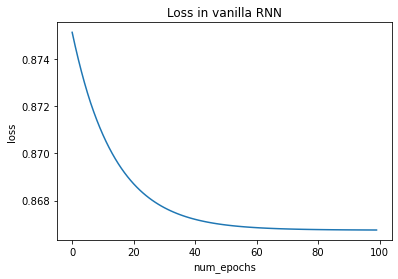

In [21]:
#-------------------------------------------------
#--------- 22/06 - updated version ---------------
#-------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim


# Define Vanilla RNN model
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, inputs):
        outputs, _ = self.rnn(inputs)
        outputs = self.relu(outputs)
        #print(outputs[ -1,:])
        logits = self.fc(outputs[-1,:])  # Take the last output of the sequence
        output = torch.relu(logits)
        return logits


# Define the training data
num_trials = 100
sequence_length = 1
input_size = 1
input_trials = torch.randint(2, size=(num_trials, sequence_length)).float()
#print('input_trials=',input_trials)
targets = []
for _ in range(num_trials):
    sequence = torch.randn(sequence_length, input_size)
    #print('sequence=',sequence)
    target = torch.cumsum(sequence, dim=0)[-1] #turns positive
    
    targets.append(target)
    #print('targer=',targets)
targets = torch.stack(targets).unsqueeze(1).float()
#print('targets=',targets)
# Hyperparameters
hidden_size = 32
learning_rate = 0.01
num_epochs = 100

# Create the Vanilla RNN model
model = VanillaRNN(input_size, hidden_size)
#print('model=',model(input_trials))
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

x_axis = torch.arange(0,num_epochs)
loss_vector = []
# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0
    
    logits = model(input_trials)
    #print('logits=',logits)
    #print('targets=',targets)
    loss = criterion(logits, targets)
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    loss_vector.append(loss.item())
    epoch_loss += loss.item()

    #print("Epoch {}: Loss = {}".format(epoch+1, epoch_loss))
    
import matplotlib.pyplot as plt
plt.plot(x_axis,loss_vector)
plt.title('Loss in vanilla RNN')
plt.xlabel("num_epochs")
plt.ylabel("loss")

#set the initial state
batch_size = num_trials
initial_hidden = torch.zeros(1, batch_size, hidden_size)
print(initial_hidden)


#test the  model
model.eval()
test_input = torch.randn(sequence_length, input_size) #random input

with torch.no_grad(): #temporarily disable gradient computation
    predicted_output = model(test_input)

print("Test Input:", test_input)
print("Predicted Output:", predicted_output)

## predefined Vanilla RNNs 

In [9]:
import torch
import torch.nn as nn


class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, transform_function):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)
        self.transform = transform_function

    def forward(self, inputs, hidden=None):
        outputs, hidden = self.rnn(inputs, hidden)
        outputs = self.transform(outputs)  # Apply the transform function
        logits = self.fc(outputs[:, -1, :])
        return logits, hidden


def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function=nn.ReLU()):
    """
    Input, recurrent and output weight and recurrent and output biases need to be given
    Returns PyTorch RNN with given weights.
    """
    N_in = W_in.shape[1]
    N_out = W_out.shape[0]
    N_rec = W_hh.shape[0]

    rnn_model = VanillaRNN(N_in, N_rec, N_out, transform_function)
    with torch.no_grad():
        rnn_model.rnn.all_weights[0][0][:] = torch.tensor(W_in, dtype=torch.float)
        rnn_model.rnn.all_weights[0][1][:] = torch.tensor(W_hh, dtype=torch.float)
        rnn_model.rnn.all_weights[0][2][:] =  torch.tensor(b_hh, dtype=torch.float)
        rnn_model.rnn.all_weights[0][3][:] =  torch.zeros((N_rec), dtype=torch.float)
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))
    return rnn_model


# Define the network parameters as PyTorch tensors
W_in = torch.tensor([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]], dtype=torch.float)  # Input weights
W_hh = torch.tensor([[0.7, 0.8], [0.9, 1.0]], dtype=torch.float)  # Recurrent weights
W_out = torch.tensor([[0.2, 0.4]], dtype=torch.float)  # Output weights
b_hh = torch.tensor([0.1, 0.2], dtype=torch.float)  # Recurrent biases
b_out = torch.tensor([0.3], dtype=torch.float)  # Output biases

# Create an RNN model using the network parameters and ReLU as the transform function
rnn_model = make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, nn.ReLU())

# Print the model architecture
print(rnn_model)

# Perform forward pass with sample input
input_data = torch.tensor([[[0.2, 0.4, 0.6], [0.3, 0.5, 0.7]]], dtype=torch.float)  # Sample input
output, _ = rnn_model(input_data)
print(output)


VanillaRNN(
  (rnn): RNN(3, 2)
  (fc): Linear(in_features=2, out_features=1, bias=True)
  (transform): ReLU()
)
tensor([[0.7840]], grad_fn=<AddmmBackward0>)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3748\2339530310.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.all_weights[0][0][:] = torch.tensor(W_in, dtype=torch.float)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3748\2339530310.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.all_weights[0][1][:] = torch.tensor(W_hh, dtype=torch.float)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3748\2339530310.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.all_weights[0][2][:] =  torch.tensor(b_hh, d

### Vanilla RNN with initializing the hidden state and linear in ReLU function

input_trials= tensor([[[1., 1.],
         [1., 0.],
         [0., 0.],
         [0., 1.],
         [0., 0.],
         [0., 1.],
         [0., 0.],
         [0., 1.],
         [0., 1.],
         [0., 0.],
         [0., 1.],
         [0., 0.],
         [1., 1.],
         [1., 0.],
         [1., 0.],
         [0., 1.],
         [1., 0.],
         [0., 1.],
         [1., 1.],
         [0., 0.],
         [0., 1.],
         [1., 0.],
         [1., 0.],
         [1., 1.],
         [0., 1.],
         [0., 0.],
         [1., 0.],
         [1., 0.],
         [0., 1.],
         [1., 1.],
         [1., 1.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [1., 0.],
         [0., 0.],
         [1., 0.],
         [0., 0.],
         [1., 1.],
         [1., 0.],
         [0., 0.],
         [0., 0.],
         [1., 1.],
         [1., 1.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [0., 1.],
         [0., 0.],
         [0., 1.],
         [0., 0.],
         [1., 0.]

C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([100, 2, 1])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


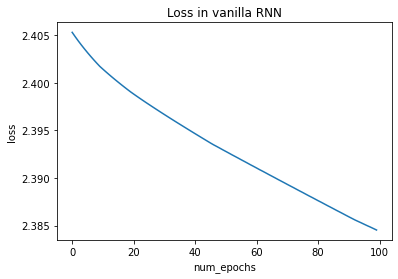

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim


class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size,num_layers = 1,nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, inputs, hidden=None):
        outputs, hidden = self.rnn(inputs, hidden)
        outputs = self.relu(outputs)
        logits = self.fc(outputs[:, -1, :])
        return logits, hidden


#training data
num_trials = 100
sequence_length = 2
input_size = 2
input_trials = torch.randint(2, size=(sequence_length, batch_size, input_size)).float()
#print('input_trials = ', input_trials)
targets = []
for _ in range(num_trials):
    sequence = torch.randn(sequence_length, input_size)
    target = torch.cumsum(sequence, dim=0)[-1]
    targets.append(target)
targets = torch.stack(targets).unsqueeze(2).float()
#print('targets= ',targets)

#Hyperparameters
hidden_size = 32
learning_rate = 0.01
num_epochs = 100

#create the Vanilla RNN model
model = VanillaRNN(input_size, hidden_size)

#loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
print('input_trials=',input_trials)
x_axis = torch.arange(0,num_epochs)
loss_vector = []
#training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0
    
    hidden = None
    logits, hidden = model(input_trials, hidden)
    
    
    loss = criterion(logits, targets)
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    loss_vector.append(loss.item())
    epoch_loss += loss.item()

    #print("Epoch {}: Loss = {}".format(epoch+1, epoch_loss))
    
#print loss function
import matplotlib.pyplot as plt
plt.plot(x_axis,loss_vector)
plt.title('Loss in vanilla RNN')
plt.xlabel("num_epochs")
plt.ylabel("loss")

#set the initial state
batch_size = num_trials
initial_hidden = torch.zeros(1, batch_size, hidden_size)

#test the  model
model.eval()
test_input = torch.randn(sequence_length, input_size) #random input
with torch.no_grad():
    predicted_output = model(test_input.unsqueeze(1).transpose(0, 1))

print("Test Input:", test_input)
print("Predicted Output:", predicted_output)

# 23/06 - updated


N_in= 10 - número de colunas do input
N_out= 5 - número de linhas do output
N_rec= 20 - número de linhas da camada recurrente
Epoch 1/10, Average Loss: 73.19563674926758
Epoch 2/10, Average Loss: 6.254050374031067
Epoch 3/10, Average Loss: 0.3530493453145027
Epoch 4/10, Average Loss: 0.031887530349195004
Epoch 5/10, Average Loss: 0.003071403072681278
Epoch 6/10, Average Loss: 0.0003072424078709446
Epoch 7/10, Average Loss: 2.9642592153322767e-05
Epoch 8/10, Average Loss: 3.0416988465731265e-06
Epoch 9/10, Average Loss: 2.88157782080134e-07
Epoch 10/10, Average Loss: 3.0614388801808445e-08
Testing Loss: 23.038602471351624


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8024\1148653543.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8024\1148653543.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8024\1148653543.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.

Text(0, 0.5, 'loss')

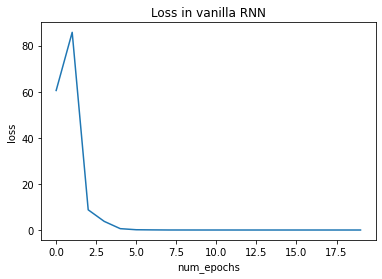

In [18]:
import torch.optim as optim
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, transform_function):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)
        self.transform = transform_function

    def forward(self, inputs, hidden=None):
        outputs, hidden = self.rnn(inputs, hidden)
        outputs = self.transform(outputs)  # Apply the transform function
        logits = self.fc(outputs[:, -1, :])
        return logits, hidden

#initializes its weights and biases based on the provided parameters
def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function=nn.ReLU()):
    """
    Input, recurrent and output weight and recurrent and output biases need to be given
    Returns PyTorch RNN with given weights.
    """
    N_in = W_in.shape[1]
    print('N_in=',N_in,'- número de colunas do input')
    N_out = W_out.shape[0]
    print('N_out=',N_out,'- número de linhas do output')
    N_rec = W_hh.shape[0]
    print('N_rec=',N_rec,'- número de linhas da camada recurrente')

    rnn_model = VanillaRNN(N_in, N_rec, N_out, transform_function)
    with torch.no_grad():
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.zeros((N_rec), dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))

    return rnn_model


# Initialize the model with desired weights and biases
input_size = 10
hidden_size = 20
output_size = 5

W_in = torch.randn(hidden_size, input_size)
W_hh = torch.randn(hidden_size, hidden_size)
W_out = torch.randn(output_size, hidden_size)
b_hh = torch.randn(hidden_size)
b_out = torch.randn(output_size)

model = make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out)

# Define the training and testing datasets (example)
train_dataset = [(torch.randn(1, 1, input_size), torch.tensor([1, 0, 0, 0, 0], dtype=torch.float32)),
                 (torch.randn(1, 1, input_size), torch.tensor([0, 1, 0, 0, 0], dtype=torch.float32))]

test_dataset = [(torch.randn(1, 1, input_size), torch.tensor([1, 0, 0, 0, 0], dtype=torch.float32)),
                (torch.randn(1, 1, input_size), torch.tensor([0, 1, 0, 0, 0], dtype=torch.float32))]

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10

x_axis = torch.arange(0,len(train_dataset)*num_epochs)
loss_vector = []
for epoch in range(num_epochs):
    total_loss = 0
    
    for inputs, targets in train_dataset:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs, _ = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs.squeeze(), targets)
        
        # Backward pass
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        loss_vector.append(loss.item())
        total_loss += loss.item()
        
    avg_loss = total_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss}")


# Testing
total_loss = 0

for inputs, targets in test_dataset:
    # Forward pass
    outputs, _ = model(inputs)
    
    # Compute the loss
    loss = criterion(outputs.squeeze(), targets)
    
    total_loss += loss.item()

avg_loss = total_loss / len(test_dataset)
print(f"Testing Loss: {avg_loss}")


import matplotlib.pyplot as plt
plt.plot(x_axis,loss_vector)
plt.title('Loss in vanilla RNN')
plt.xlabel("num_epochs")
plt.ylabel("loss")

## USING THE PARAMETERS IN THE MANUSCRIPT

In [ ]:
#-------------isnt running!!!!!!!!!!-----------------
import torch.optim as optim
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, transform_function):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)
        self.transform = transform_function

    def forward(self, inputs, hidden=None):
        outputs, hidden = self.rnn(inputs, hidden)
        outputs = self.transform(outputs)  # Apply the transform function
        logits = self.fc(outputs[:, -1, :])
        return logits, hidden

#initializes its weights and biases based on the provided parameters
def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function=nn.ReLU()):
    """
    Input, recurrent and output weight and recurrent and output biases need to be given
    Returns PyTorch RNN with given weights.
    """
    N_in = W_in.shape[1]
    print('N_in=',N_in,'- número de colunas do input')
    N_out = W_out.shape[0]
    print('N_out=',N_out,'- número de linhas do output')
    N_rec = W_hh.shape[0]
    print('N_rec=',N_rec,'- número de linhas da camada recurrente')

    rnn_model = VanillaRNN(N_in, N_rec, N_out, transform_function)
    with torch.no_grad():
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.zeros((N_rec), dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))

    return rnn_model


# Initialize the model with desired weights and biases
input_size = 2
hidden_size = 2
output_size = 2

# IDENTITY RNN
W_in = torch.eye(input_size)
W_hh = torch.eye(hidden_size)
W_out = torch.Tensor(np.array([[-1],[1]]))
b_hh = torch.Tensor(np.array([[0],[0]]))
b_out = 0

model = make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out)
print(model)

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

# Generate a single training sample
batch_size = 1
input_length = 1
input_sequence = torch.randn(batch_size, input_length, input_size)
print('input_sequence = ',input_sequence)
target_output = torch.tensor([[1,0]], dtype=torch.float32)


num_epochs = 10

loss_vector = []
for epoch in range(num_epochs):
    
    model.train()
    optimizer.zero_grad()
    output, _ = model(input_sequence)
    loss = criterion(output, target_output)
    loss.backward()
    optimizer.step()

    loss_vector.append(loss.item())

    # Print the loss for monitoring
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# Plot the loss curve
import matplotlib.pyplot as plt

x_axis = torch.arange(0, num_epochs)
plt.plot(x_axis, loss_vector)
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## --------------------------------------------

### other experiments

## ----------------------------------------------

Define the ODE function:
$\dot{x}=-x+\left [ Wx+b \right ]_{+}$
Where x is the hidden state, b is the bias, and $\left [ \cdot  \right ]_{+}=max(0,\cdot )$

In [37]:
import numpy as np
from scipy.integrate import solve_ivp
#define the ODE function
def ode_func(t, state, w, b):
    wx_plus_b = np.maximum(0, np.dot(w, state) + b)
    dstate_dt = -state + wx_plus_b
    return dstate_dt

#integration function
def integrate_rnn_attractors(w, b, initial_state, t_start, t_end, num_points):
    t_span = (t_start, t_end)
    t_eval = np.linspace(t_start, t_end, num_points)

    ode_args = (w, b)
    solution = solve_ivp(ode_func, t_span, initial_state, t_eval=t_eval, args=ode_args)

    return solution.t, solution.y

#define parameters and initial conditions
num_units = 5
w = np.random.randn(num_units, num_units)  # Connectivity matrix
#b = np.random.randn(num_units)  # Bias vector
initial_state = np.random.randn(num_units)
#initial_state = torch.randint(2, size=(1,num_units)).float()
print(initial_state)

#print(lele)
t_start = 0
t_end = 1
num_points = 1000

#integration
t, state = integrate_rnn_attractors(w, b, initial_state, t_start, t_end, num_points)

#result
integrated_output = state[:, -1]
print("Integrated output:", integrated_output)


[ 0.3997265   0.58227564  1.09807511  0.78365554 -0.48180916]
Integrated output: [ 0.14706616  0.86011094  0.45784723  0.28832017 -0.17726577]


for **unbounded line attractors (BLA)**, the W = $\begin{bmatrix}
0 & 1\\ 1 & 0
\end{bmatrix}$
and b= 0. 

The resulting flow diverges to infinity along the diagonal. The backpropagating over time exponentially grows in magnitude

In [9]:
def ode_func(t, state, b):
    w = np.array([[0, 1], [1, 0]])
    wx_plus_b = np.maximum(0, np.dot(w, state) + b)
    dstate_dt = -state + wx_plus_b
    return dstate_dt

def integrate_rnn_attractors(b, initial_state, t_start, t_end, num_points):
    t_span = (t_start, t_end)
    t_eval = np.linspace(t_start, t_end, num_points)

    ode_args = (b,)
    solution = solve_ivp(ode_func, t_span, initial_state, t_eval=t_eval, args=ode_args)

    return solution.t, solution.y

num_units = 2
b = 0  # Bias vector
initial_state = np.zeros(num_units)
t_start = 0
t_end = 1
num_points = 1000

t, state = integrate_rnn_attractors(b, initial_state, t_start, t_end, num_points)

integrated_output = state[:, -1]
print("Integrated output:", integrated_output)

integrated_output = state[:, -1]
print("Integrated output:", integrated_output)


Integrated output: [0. 0.]
Integrated output: [0. 0.]


In [ ]:
# Assuming test_input is the input sequence for testing
test_input = test_input = torch.randn(sequence_length, input_size)  # Test input sequence

with torch.no_grad():
    model.eval()

    test_input = torch.tensor(test_input, dtype=torch.float32)
    predicted_output = model(test_input.unsqueeze(0).unsqueeze(0)).squeeze().numpy()

    print("Predicted output:", predicted_output)


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

# number of trials and sequence length
num_trials = 1000
sequence_length = 1
input_size = 1

# Random sequence of 0 and 1
input_trials = torch.randint(2, size=(num_trials, sequence_length)).float()

# Generation of random input trials
targets = []
for _ in range(num_trials):
    sequence = torch.randn(sequence_length, input_size)
    # Cumulative sum of the sequence
    target = torch.cumsum(sequence, dim=0)
    targets.append(target)

# Convert input trials and targets to tensors
target_trials = torch.stack(targets).float()

sample_index = 0
print("Input Trial:", input_trials[sample_index])
print("Target:", targets[sample_index])

class AttractorLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(AttractorLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)  # get the batch size
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Apply ReLU and linear layer
        out = self.relu(out)
        out = self.fc(out)
        return out.squeeze(2)

hidden_size = 32
num_layers = 1

model = AttractorLSTM(input_size, hidden_size, num_layers)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, targets in zip(input_trials, target_trials):
        optimizer.zero_grad()

        inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(0)
        targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(0)

        outputs = model(inputs)

        loss = criterion(outputs, targets)
        epoch_loss += loss.item()

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(input_trials)}")


Input Trial: tensor([0.])
Target: tensor([[0.9264]])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7572\955524387.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7572\955524387.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(0)


RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors